# Matplotlib

Matplotlib 是Python中类似 MATLAB 的绘图工具，熟悉 MATLAB 也可以很快的上手 Matplotlib。

## 1. 认识Matploblib

**1.1 Figure**

在任何绘图之前，我们需要一个Figure对象，可以理解成我们需要一张画板才能开始绘图。

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

**1.2Axes**

在拥有Figure对象之后，在作画前我们还需要轴，没有轴的话就没有绘图基准，所以需要添加Axes。也可以理解成为真正可以作画的纸。

In [17]:
ax = fig.add_subplot(111)
ax.set(xlim=[0.5,4.5],ylim=[-2,8],title='An Example Axes',
      ylabel='Y-Axes', xlabel='X-Axes')
plt.show()

上的代码，在一幅图上添加了一个Axes，然后设置了这个Axes的X轴以及Y轴的取值范围（这些设置并不是强制的，后面会再谈到关于这些设置），效果如下图：

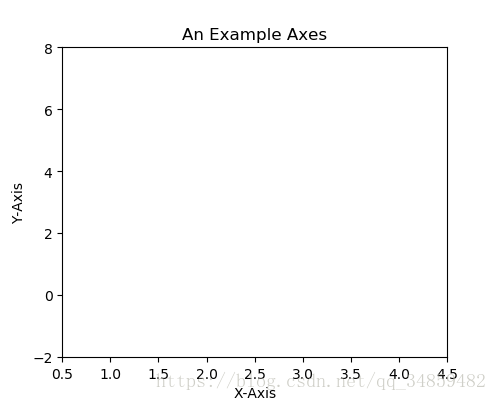

对于上面的fig.add_subplot(111)就是添加Axes的，参数的解释的在画板的第1行第1列的第一个位置生成一个Axes对象来准备作画。也可以通过fig.add_subplot(2, 2, 1)的方式生成Axes，前面两个参数确定了面板的划分，例如 2， 2会将整个面板划分成 2 * 2 的方格，第三个参数取值范围是 [1, 2*2] 表示第几个Axes。如下面的例子：

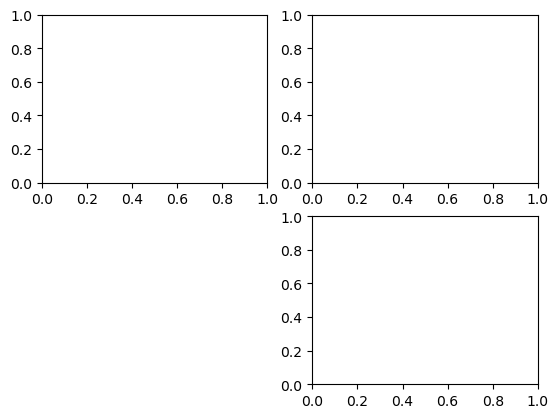

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)

**1.3 Multiple Axes**

可以发现我们上面添加 Axes 似乎有点弱鸡，所以提供了下面的方式一次性生成所有 Axes：

[Text(0.5, 1.0, 'Lower Right')]

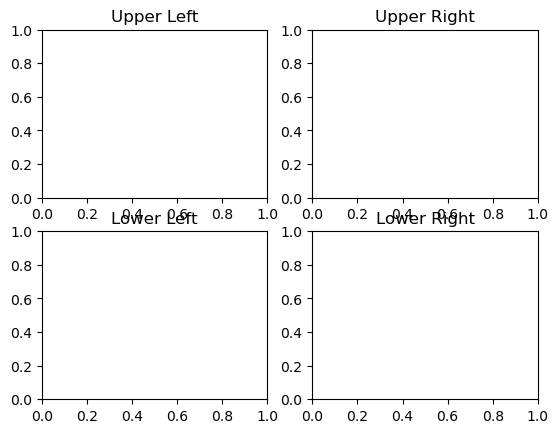

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

fig 还是我们熟悉的画板， axes 成了我们常用二维数组的形式访问，这在循环绘图时，额外好用。

**1.4 Axes Vs .pyplot**

相信不少人看过下面的代码，很简单并易懂，但是下面的作画方式只适合简单的绘图，快速的将图绘出。在处理复杂的绘图工作时，我们还是需要使用 Axes 来完成作画的。

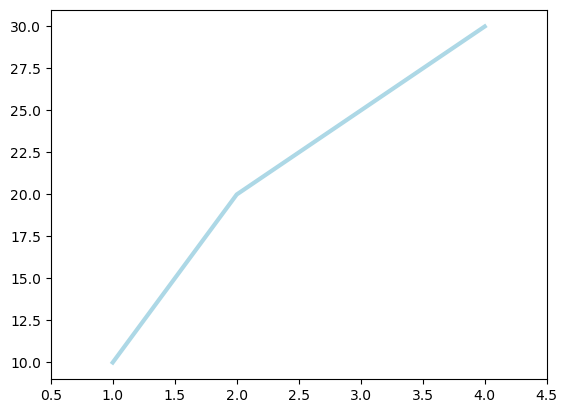

In [27]:
plt.plot([1,2,3,4], [10,20,25,30], color='lightblue', linewidth=3)
plt.xlim(0.5, 4.5)
plt.show()

## 2. 基本绘图2D

**2.1 线**

plot()函数画出一系列的点，并且用线将它们连接起来。看下例子：

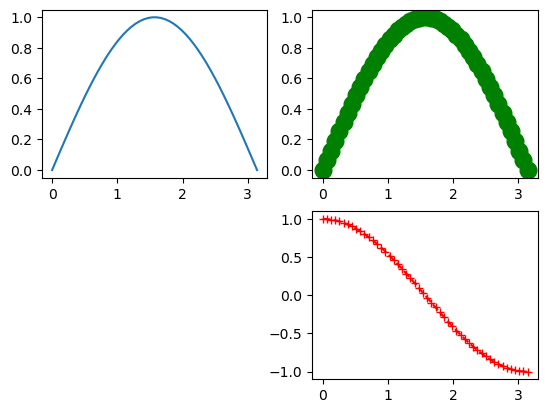

In [29]:
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)

x = np.linspace(0, np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)

ax1.plot(x, y_sin)
ax2.plot(x, y_sin, 'go--', linewidth=2,markersize=12)
ax3.plot(x, y_cos, color='red', marker='+', linestyle='dashed')

在上面的三个Axes上作画。plot，前面两个参数为x轴、y轴数据。ax2的第三个参数是 MATLAB风格的绘图，对应ax3上的颜色，marker，线型。

另外，我们可以通过关键字参数的方式绘图，如下例：

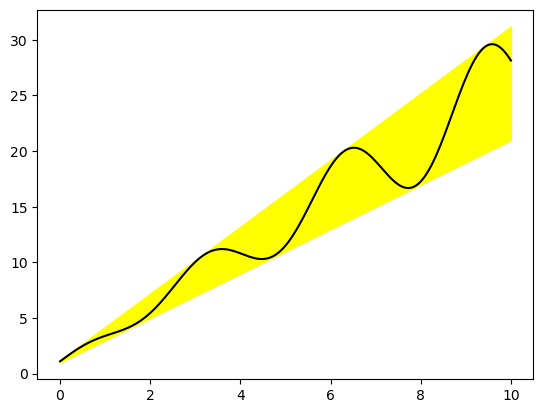

In [30]:
x = np.linspace(0,10,200)
data_obj={
    'x' : x,
    'y1': 2 * x + 1,
    'y2': 3 * x + 1.2,
    'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1
}
fig, ax = plt.subplots()

#填充两条线之间的颜色
ax.fill_between('x', 'y1', 'y2', color='yellow', data=data_obj)

#Plot the "centerline" with 'plot'
ax.plot('x', 'mean', color="black", data= data_obj)

plt.show()

**2.2 散点图**

只画点，但是不用线连接起来。

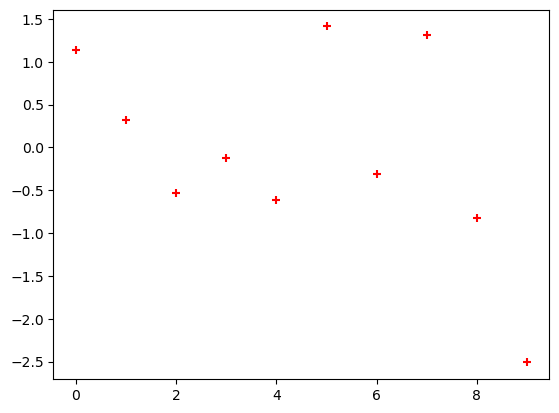

In [31]:
x = np.arange(10)
y = np.random.randn(10)
plt.scatter(x,y,color='red', marker='+')
plt.show()

**2.3条形图**

条形图分两种，一种是水平的，一种是垂直的，见下例子：

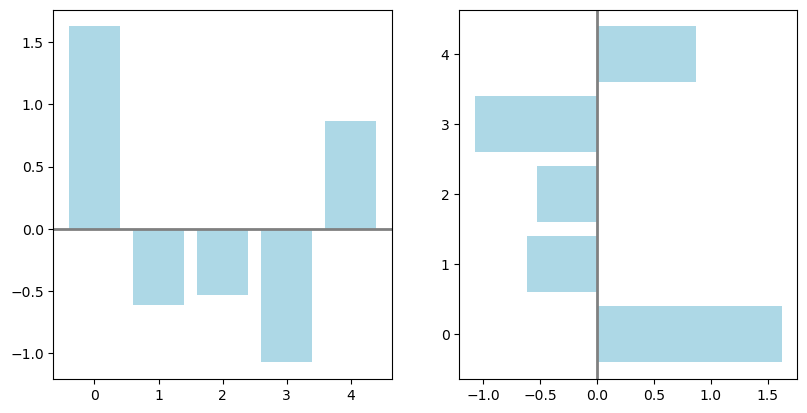

In [32]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols = 2, figsize=plt.figaspect(1./2))
vert_bars = axes[0].bar(x,y,color='lightblue', align='center')
horiz_nars = axes[1].barh(x,y,color='lightblue', align='center')

#在水平或者垂直方向上画直线
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)
plt.show()

条形图还返回了一个Artists 数组，对应着每个条形，例如上图 Artists 数组的大小为5，我们可以通过这些 Artists 对条形图的样式进行更改，如下例：

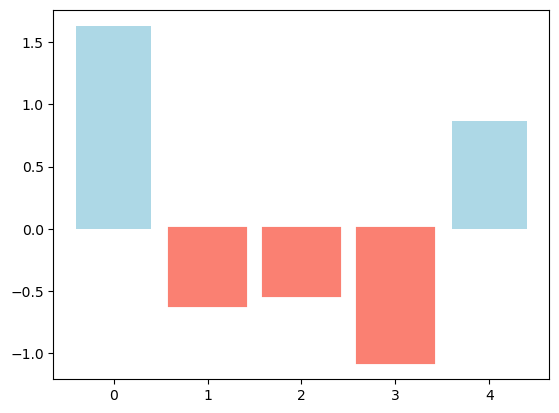

In [33]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y, color='lightblue', align='center')

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)

plt.show()

**2.4 直方图**

直方图用于统计数据出现的次数或者频率，有多种参数可以调整，见下例：

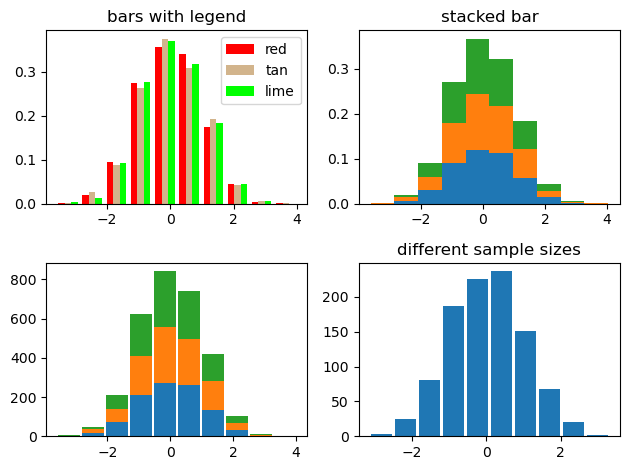

In [34]:
np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='barstacked')
ax1.set_title('stacked bar')

ax2.hist(x,  histtype='barstacked', rwidth=0.9)

ax3.hist(x[:, 0], rwidth=0.9)
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

参数中density控制Y轴是概率还是数量，与返回的第一个的变量对应。histtype控制着直方图的样式，默认是 ‘bar’，对于多个条形时就相邻的方式呈现如子图1， ‘barstacked’ 就是叠在一起，如子图2、3。 rwidth 控制着宽度，这样可以空出一些间隙，比较图2、3. 图4是只有一条数据时。

**2.5 饼图**

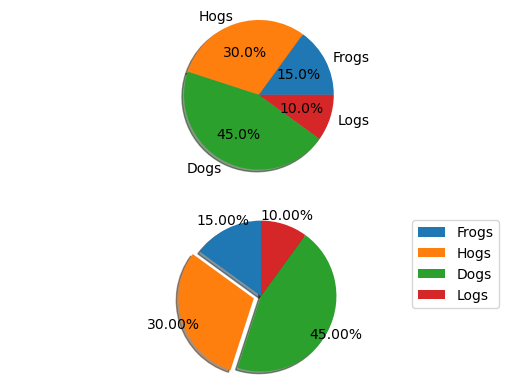

In [35]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2) = plt.subplots(2)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax2.pie(sizes, autopct='%1.2f%%', shadow=True, startangle=90, explode=explode,
    pctdistance=1.12)
ax2.axis('equal')
ax2.legend(labels=labels, loc='upper right')

plt.show()

饼图自动根据数据的百分比画饼.。labels是各个块的标签，如子图一。autopct=%1.1f%%表示格式化百分比精确输出，explode，突出某些块，不同的值突出的效果不一样。pctdistance=1.12百分比距离圆心的距离，默认是0.6.

**2.6 箱形图**

为了专注于如何画图，省去数据的处理部分。 data 的 shape 为 (n, )， data2 的 shape 为 (n, 3)。

**2.7 泡泡图**

散点图的一种，加入了第三个值 s 可以理解成普通散点，画的是二维，泡泡图体现了Z的大小，如下例：

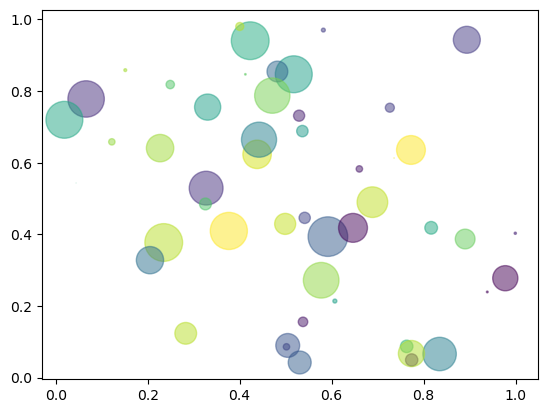

In [41]:
np.random.seed(19680802)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

**2.8 等高线（轮廓图）**

有时候需要描绘边界的时候，就会用到轮廓图，机器学习用的决策边界也常用轮廓图来绘画，见下例：

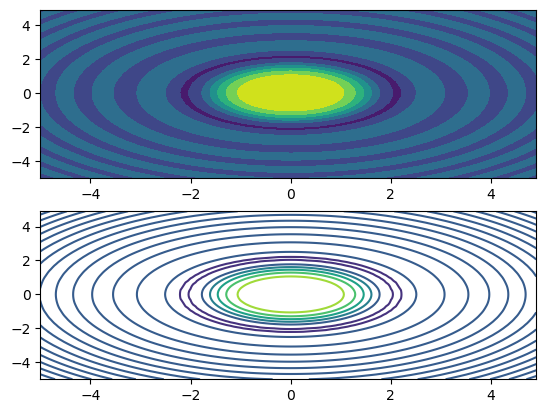

In [42]:
fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
ax1.contourf(x, y, z)
ax2.contour(x, y, z)

上面画了两个一样的轮廓图，contourf会填充轮廓线之间的颜色。数据x, y, z通常是具有相同 shape 的二维矩阵。x, y 可以为一维向量，但是必需有 z.shape = (y.n, x.n) ，这里 y.n 和 x.n 分别表示x、y的长度。Z通常表示的是距离X-Y平面的距离，传入X、Y则是控制了绘制等高线的范围。

## 3 布局、图例说明、边界等

**3.1区间上下限**

当绘画完成后，会发现X、Y轴的区间是会自动调整的，并不是跟我们传入的X、Y轴数据中的最值相同。为了调整区间我们使用下面的方式：

In [ ]:
ax.set_xlim([xmin,xmax]) #设置x轴区间
ax.set_ylim([ymin,ymax]) #设置y轴区间
ax.set_axis([xmin,xmax,ymin,ymax]) #X,Y轴区间
ax.set_ylim(bottom=-10) #y轴下限
ax.set_xlim(right=25) #x轴上限

具体效果见下例:

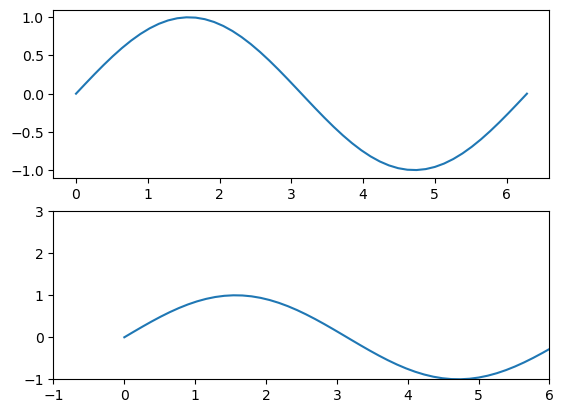

In [43]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x, y)
ax2.plot(x, y)
ax2.set_xlim([-1,6])
ax2.set_ylim([-1,3])
plt.show()

**3.2 图例说明**

我们如果我们在一个Axes上做多次绘画，那么可能出现分不清哪条线或点所代表的意思。这个时间添加图例说明，就可以解决这个问题了，见下例：

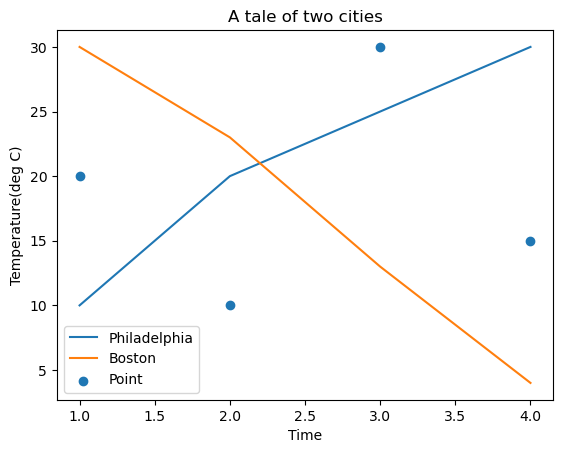

In [44]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [10,20,25,30], label='Philadelphia')
ax.plot([1,2,3,4], [30,23,13,4], label='Boston')
ax.scatter([1,2,3,4], [20,10,30,15], label='Point')
ax.set(ylabel='Temperature(deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

在绘图时传入 label 参数，并最后调用ax.legend()显示体力说明，对于 legend 还是传入参数，控制图例说明显示的位置：

|Location String|Location Code|
|--------|--------|
|‘best’|	0|
|‘upper right’|	1|
|‘upper left’|	2|
|‘lower left’	|3|
|‘lower right’	|4|
|‘right’	|5|
|‘center left’	|6|
|‘center right’	|7|
|‘lower center’	|8|
|‘upper center’|	9|
|‘center’	|10|

**3.3 区间分段**

默认情况下，绘图结束之后，Axes 会自动的控制区间的分段。见下例：

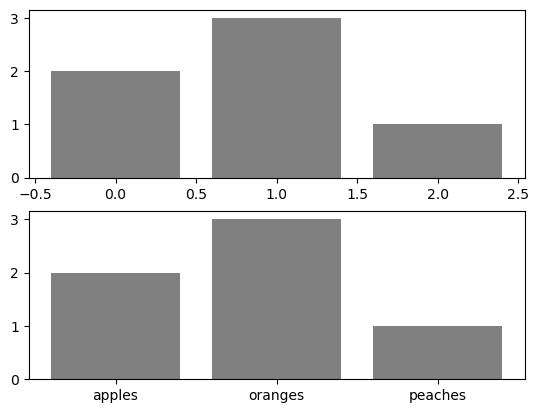

In [45]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(len(fruit))
ax1.bar(x, value, align = 'center', color='gray')
ax2.bar(x, value, align = 'center', color='gray')

ax2.set(xticks=x, xticklabels=fruit)

ax.tick_params(axis='y', direction='inout', length=10)#修改 ticks 的方向以及长度
plt.show()

**3.4 布局**

当我们绘画多个子图时，就会有一些美观的问题存在，例如子图之间的间隔，子图与画板的外边间距以及子图的内边距，下面说明这个问题：

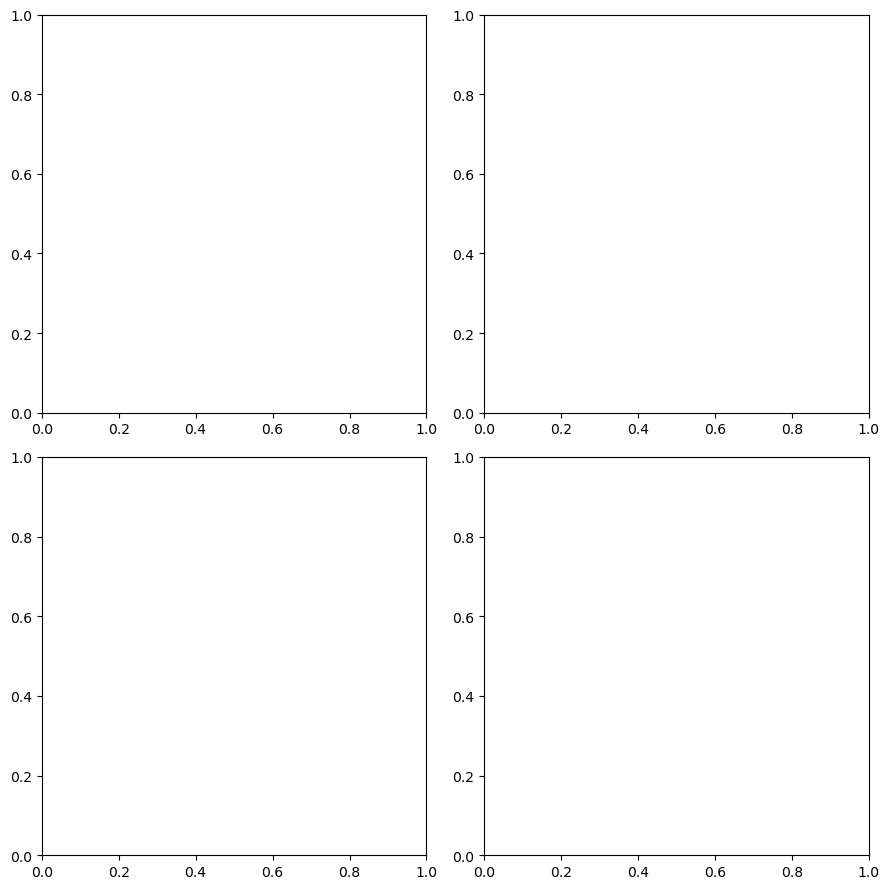

In [48]:
fig, axes = plt.subplots(2,2,figsize=(9,9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                   left=0.125, right=0.9,
                   top=0.9, bottom=0.1)

fig.tight_layout() #自动调整布局, 使标题之间不重叠
plt.show()

观察上面的四个子图，可以发现他们的X、Y的区间是一致的，而且这样显示并不美观，所以可以调整使他们使用一样的X、Y轴：

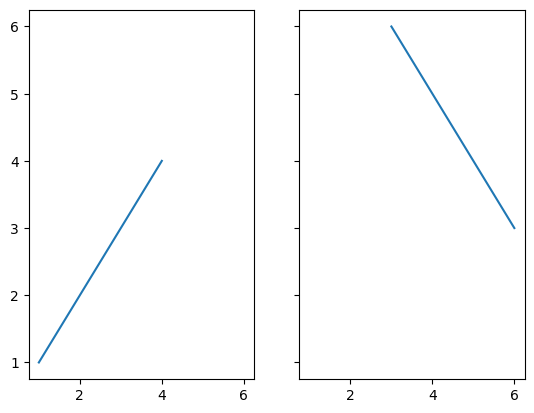

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,sharex=True, sharey=True)
ax1.plot([1,2,3,4], [1,2,3,4])
ax2.plot([3,4,5,6], [6,5,4,3])
plt.show()

**3.5 轴相关**

改变边界的位置，去掉四周的边框：

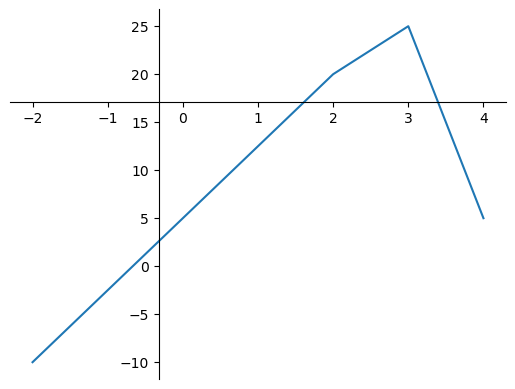

In [51]:
fig, ax = plt.subplots()
ax.plot([-2,2,3,4], [-10,20,25,5])
ax.spines['top'].set_visible(False) #顶边界不可见
ax.xaxis.set_ticks_position('bottom') #ticks的位置为下方, 分上下的
ax.spines['right'].set_visible(False) #右边界不可见
ax.yaxis.set_ticks_position('left')

#'outward'
# 移动左、下边界离 Axes 10 个距离
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_position(('outward', 10))

# "data"
# 移动左、下边界到 (0, 0) 处相交
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# "axes"
# 移动边界，按 Axes 的百分比位置
ax.spines['bottom'].set_position(('axes', 0.75))
ax.spines['left'].set_position(('axes', 0.3))

plt.show()